In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [102]:
#load the data
df = pd.read_csv("titanic_train.csv")

In [103]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [104]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [106]:
missing_values=[values for values in df.columns if df[values].isnull().sum()>1]
missing_values

['Age', 'Cabin', 'Embarked']

# Missing Values

In [107]:
for value in missing_values:
    print(value,np.round(df[value].isnull().mean(),4),'% missing values')

Age 0.1987 % missing values
Cabin 0.771 % missing values
Embarked 0.0022 % missing values


As Cabin has 77% missing data so we will drop in future.

In [108]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [109]:
from sklearn.impute import SimpleImputer

In [110]:
imp=SimpleImputer(strategy='most_frequent')

In [111]:
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [112]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [113]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt


# Visulization

In [115]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

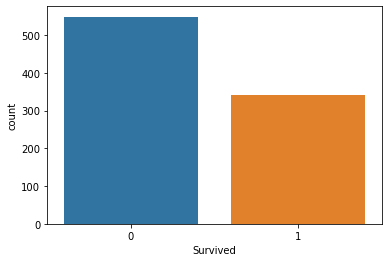

In [116]:
sns.countplot(x="Survived",data=df)

Sex       female  male
Survived              
0             81   468
1            233   109


[Text(0.5, 1.0, 'Sex Vs Survived')]

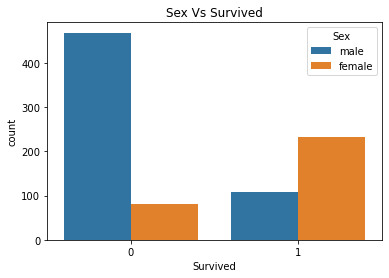

In [117]:
print(pd.crosstab(df['Survived'],df['Sex']))
a=sns.countplot(x='Survived',hue='Sex',data=df)
a.set(title='Sex Vs Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

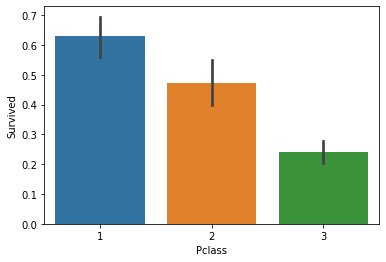

In [118]:
sns.barplot(x='Pclass',y='Survived',data=df)

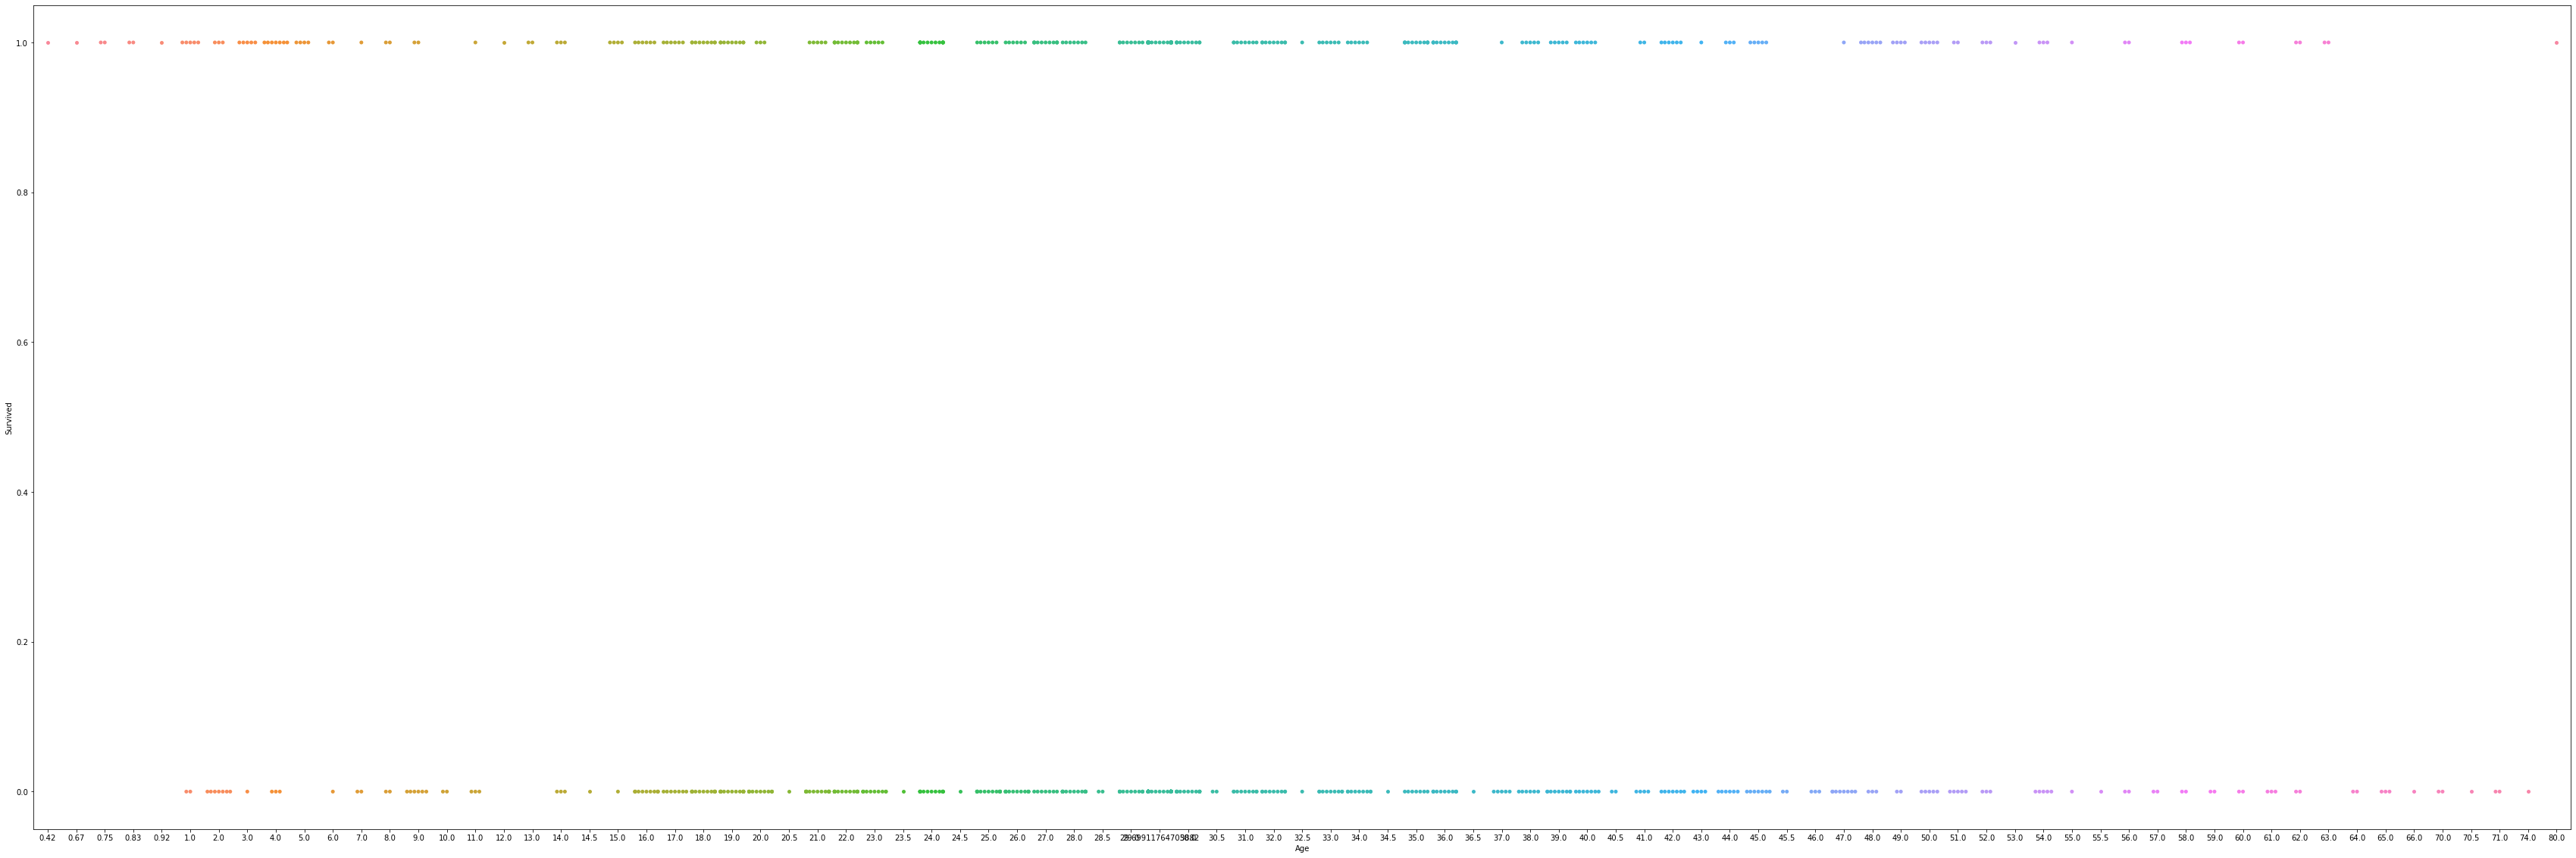

In [119]:
plt.figure(figsize=(60,20))
sns.swarmplot(x='Age',y='Survived',data=df)
plt.show()

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

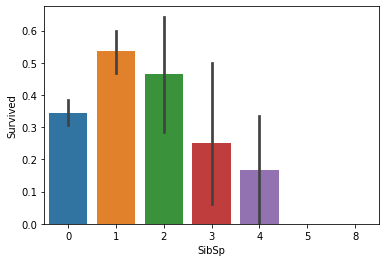

In [120]:
sns.barplot(x='SibSp',y='Survived',data=df)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

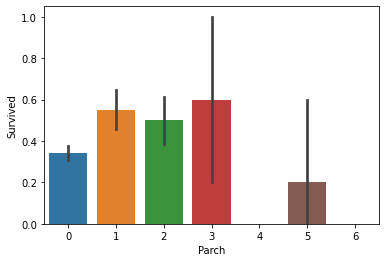

In [121]:
sns.barplot(x='Parch',y='Survived',data=df)

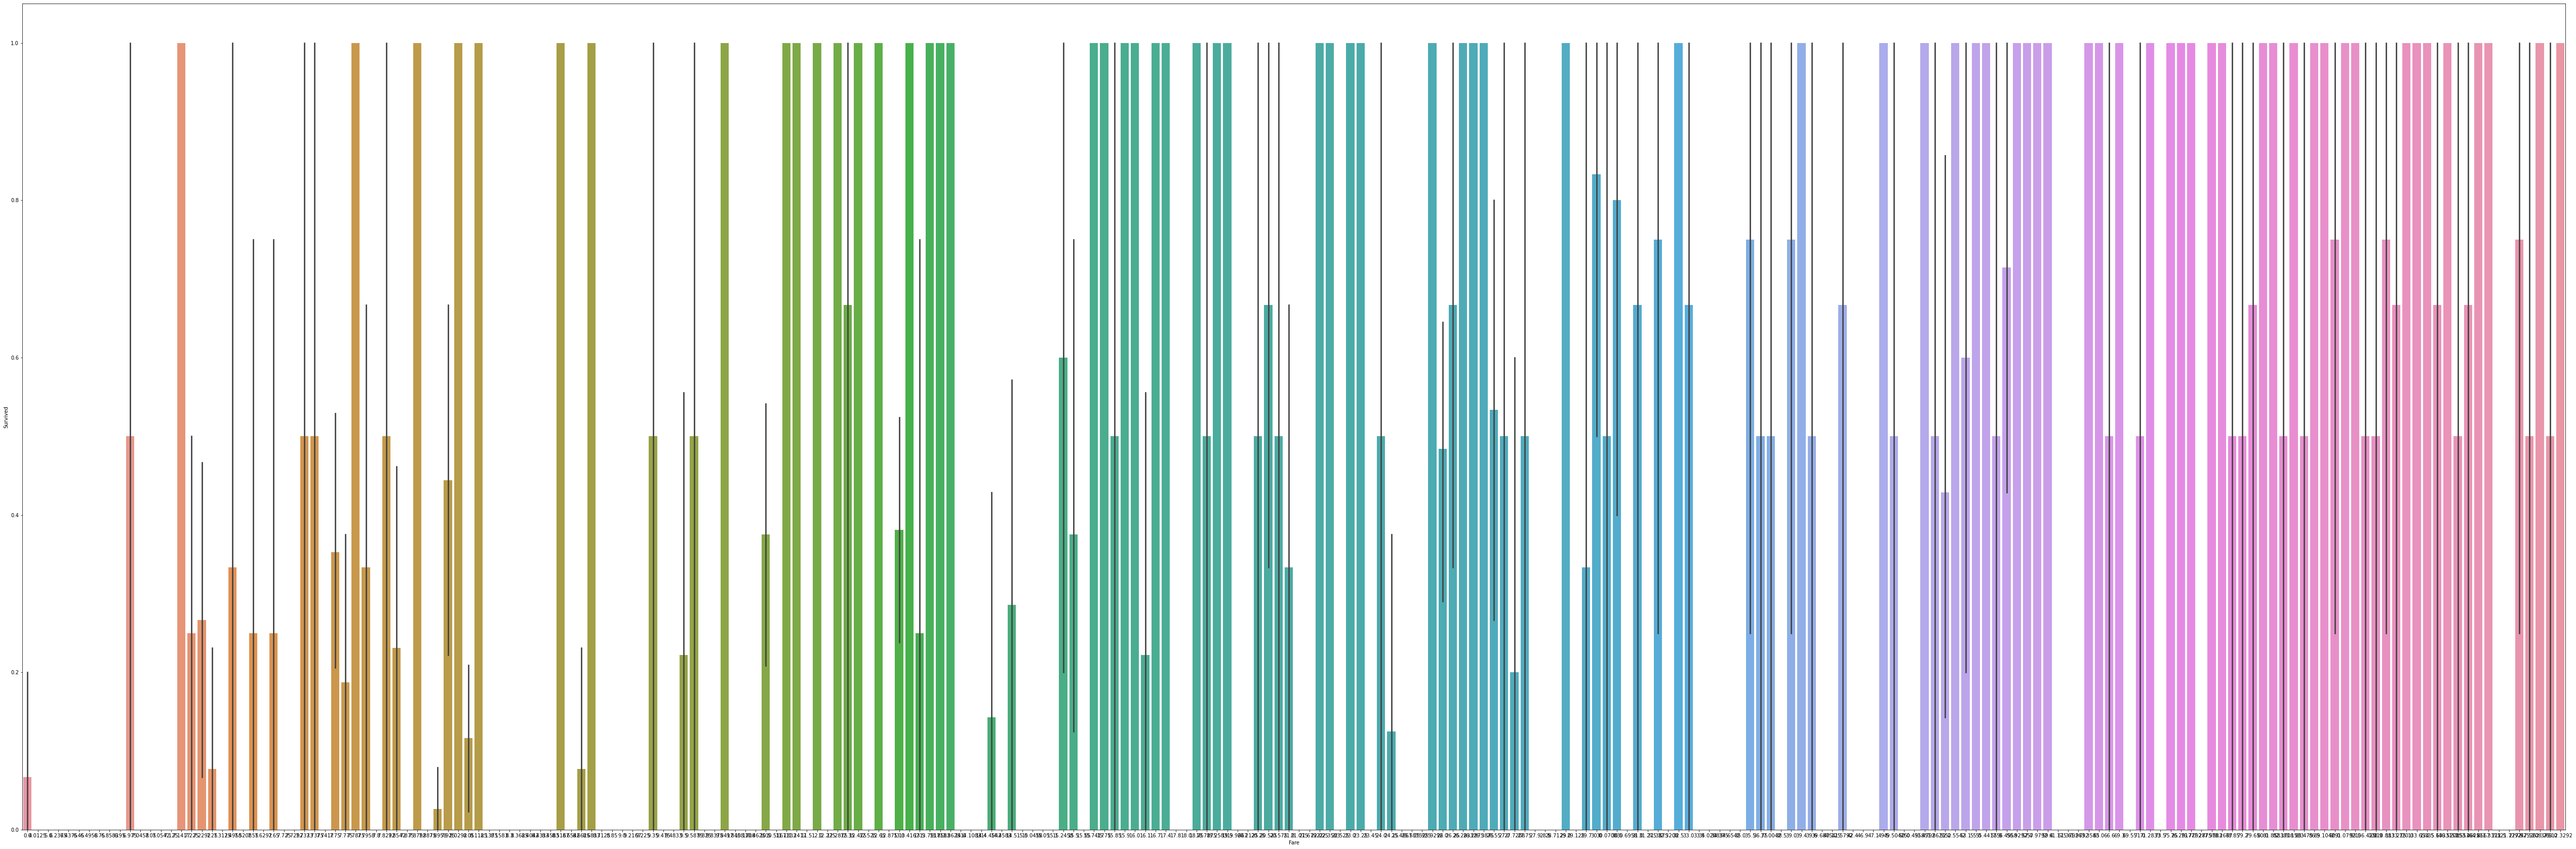

In [122]:
plt.figure(figsize=(90,30))
sns.barplot(x='Fare',y='Survived',data=df)
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

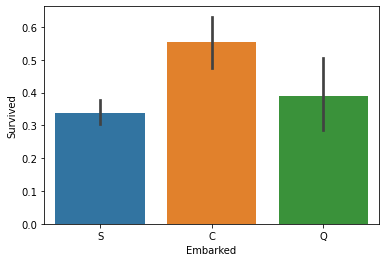

In [123]:
sns.barplot(x='Embarked',y='Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

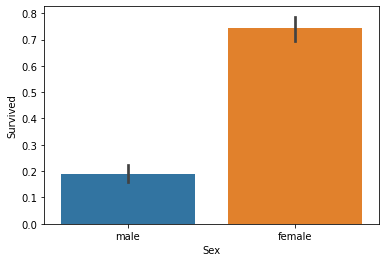

In [124]:
sns.barplot(x='Sex',y='Survived',data=df)

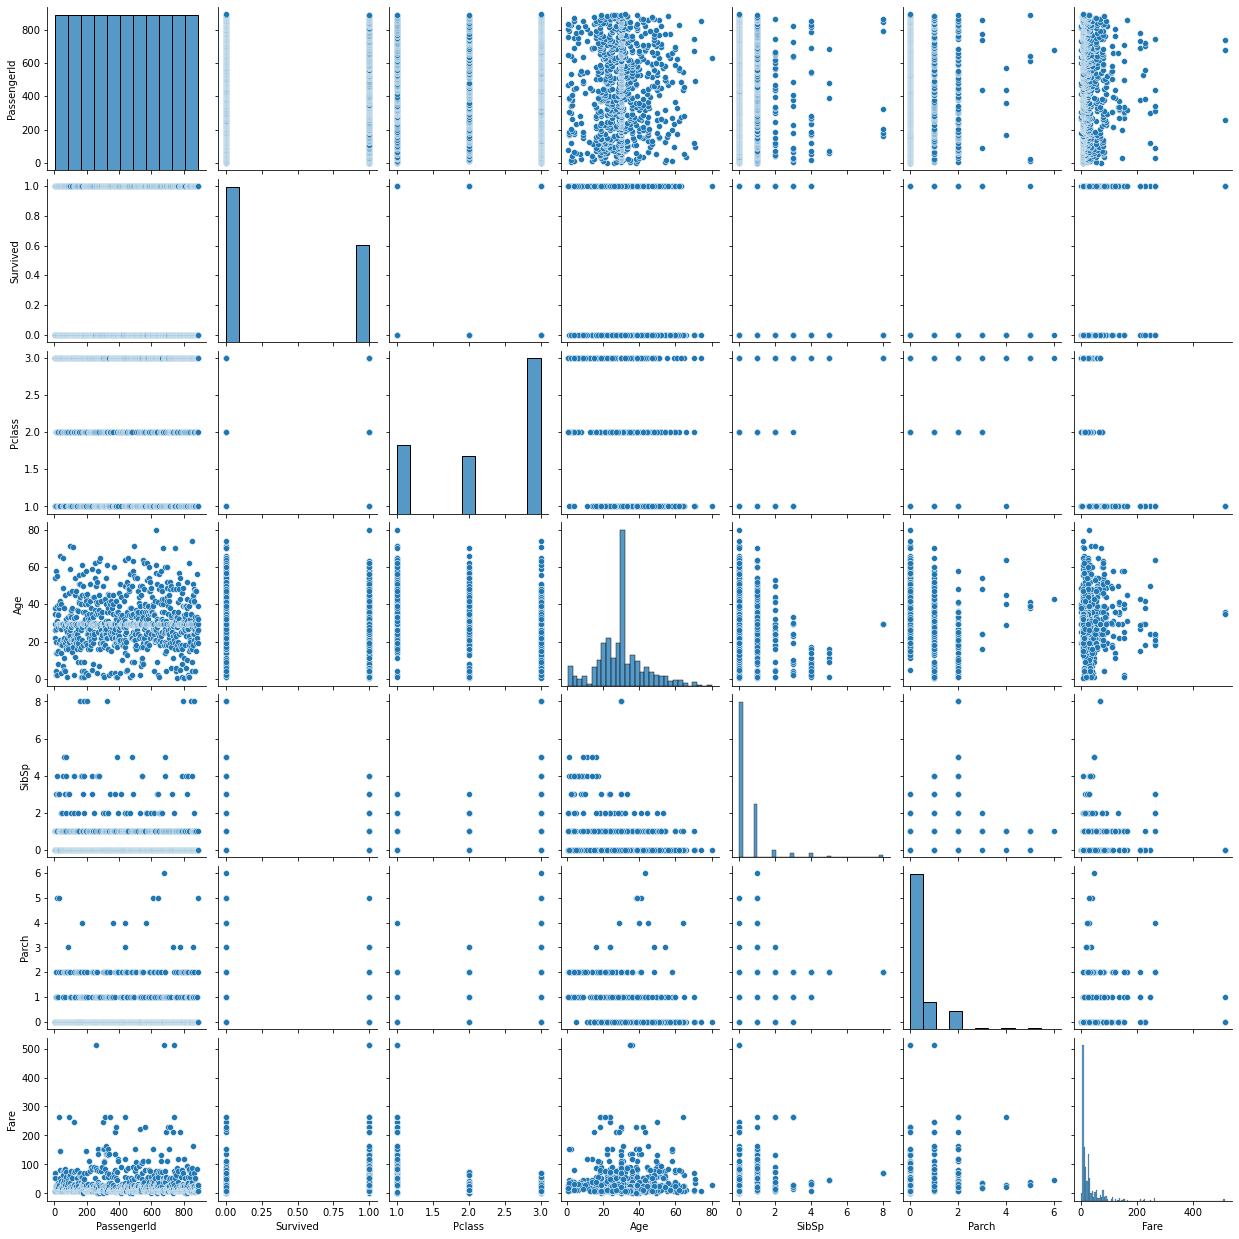

In [125]:
sns.pairplot(df)
plt.show()

In [126]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [127]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [128]:
df['Family']=df['Parch']+df['SibSp']

In [129]:
print(df['Family'].value_counts())
df.loc[df['Family']>0,'Not_Alone']=0
df.loc[df['Family']==0,'Not_Alone']=1

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64


In [130]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Not_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0


In [131]:
df['Not_Alone'].value_counts()

1.0    537
0.0    354
Name: Not_Alone, dtype: int64

# Data Cleaning

In [132]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Age','Fare','Family'],axis=1,inplace=True)

In [133]:

df.head()

,Survived,Pclass,Sex,Embarked,Not_Alone
0,0,3,male,S,0.0
1,1,1,female,C,0.0
2,1,3,female,S,1.0
3,1,1,female,S,0.0
4,0,3,male,S,1.0


In [134]:
from sklearn.preprocessing import LabelEncoder

In [135]:
lb=LabelEncoder()

In [136]:
l=['Sex','Embarked']

for i in l:
    df[i]=lb.fit_transform(df[i])
    
df

,Survived,Pclass,Sex,Embarked,Not_Alone
0,0,3,1,2,0.0
1,1,1,0,0,0.0
2,1,3,0,2,1.0
3,1,1,0,2,0.0
4,0,3,1,2,1.0
...,...,...,...,...,...
886,0,2,1,2,1.0
887,1,1,0,2,1.0
888,0,3,0,2,0.0
889,1,1,1,0,1.0


In [137]:
x=df.drop('Survived',axis=1)
y=df['Survived']
print(y.value_counts())

0    549
1    342
Name: Survived, dtype: int64


# SMOTE

In [138]:
from imblearn.over_sampling import SMOTE

In [139]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [140]:
trainy.value_counts()

1    549
0    549
Name: Survived, dtype: int64

# Standard Scaler

In [184]:
from sklearn.preprocessing import StandardScaler


In [185]:
std=StandardScaler()

In [186]:
X=std.fit_transform(x)

In [187]:
x=X

In [188]:
from sklearn.model_selection  import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [189]:
lg=LogisticRegression()


# Ramdom State Selection

In [190]:
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score is well')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

Random state 112 score is well
test score 77.6536312849162
train score 77.6685393258427


In [191]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=52)

In [192]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [193]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()

In [194]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred)*100)

In [195]:
fun(lg)

Accuracy Score 77.09497206703911
Confusion Matrix
 [[92 21]
 [20 46]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       113
           1       0.69      0.70      0.69        66

    accuracy                           0.77       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.77      0.77      0.77       179

F1 score 69.17293233082708


In [196]:
fun(svc)

Accuracy Score 80.44692737430168
Confusion Matrix
 [[105   8]
 [ 27  39]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       113
           1       0.83      0.59      0.69        66

    accuracy                           0.80       179
   macro avg       0.81      0.76      0.77       179
weighted avg       0.81      0.80      0.80       179

F1 score 69.02654867256636


In [197]:
fun(dtc)

Accuracy Score 80.44692737430168
Confusion Matrix
 [[103  10]
 [ 25  41]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       113
           1       0.80      0.62      0.70        66

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

F1 score 70.08547008547008


In [198]:
fun(knn)

Accuracy Score 75.97765363128491
Confusion Matrix
 [[98 15]
 [28 38]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       113
           1       0.72      0.58      0.64        66

    accuracy                           0.76       179
   macro avg       0.75      0.72      0.73       179
weighted avg       0.76      0.76      0.75       179

F1 score 63.86554621848739


In [199]:
fun(gb)

Accuracy Score 75.41899441340783
Confusion Matrix
 [[89 24]
 [20 46]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       113
           1       0.66      0.70      0.68        66

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.76      0.75      0.76       179

F1 score 67.6470588235294


# Ensemble Method

In [200]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [201]:
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
gd=GradientBoostingClassifier()

In [202]:
fun(rfc)
pred=rfc.predict(x_test)

Accuracy Score 79.3296089385475
Confusion Matrix
 [[100  13]
 [ 24  42]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       113
           1       0.76      0.64      0.69        66

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179

F1 score 69.42148760330579


In [203]:
fun(ad)

Accuracy Score 77.09497206703911
Confusion Matrix
 [[92 21]
 [20 46]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       113
           1       0.69      0.70      0.69        66

    accuracy                           0.77       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.77      0.77      0.77       179

F1 score 69.17293233082708


In [204]:
fun(gd)

Accuracy Score 79.3296089385475
Confusion Matrix
 [[100  13]
 [ 24  42]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       113
           1       0.76      0.64      0.69        66

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179

F1 score 69.42148760330579


# Cross Validation

In [205]:
from sklearn.model_selection import cross_val_score

In [206]:
for i in range(2,11):
    score=cross_val_score(svc,x,y,cv=i)
    print(i)
    print(score.mean()*100)

2
78.11659192825113
3
79.91021324354658
4
80.5831616369733
5
80.47140794677044
6
80.46813592115606
7
80.58387232845894
8
80.24553571428572
9
80.35914702581368
10
80.46941323345817


In [207]:
score=cross_val_score(dtc,x,y,cv=4)
print(score.mean()*100)

79.01365491051591


In [208]:
score=cross_val_score(knn,x,y,cv=4)
print(score.mean()*100)

79.23787015715267


In [209]:
score=cross_val_score(gb,x,y,cv=4)
print(score.mean()*100)

76.43315961701612


In [210]:
score=cross_val_score(rfc,x,y,cv=4)
print(score.mean()*100)

79.01365491051591


In [211]:
score=cross_val_score(ad,x,y,cv=4)
print(score.mean()*100)

77.44162323758736


In [212]:
score=cross_val_score(gd,x,y,cv=4)
print(score.mean()*100)

79.01365491051591


# Hyper Tuning

# 

In [213]:
from sklearn.model_selection import GridSearchCV


In [214]:
p1={'n_neighbors':[1,2,3,4,5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2,3,4]}

In [215]:
gd=GridSearchCV(knn,p1)
gd.fit(x,y)
print(gd.best_params_)

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [216]:
knn1=KNeighborsClassifier(algorithm='brute',n_neighbors=3,p=3,weights='uniform')
fun(knn1)

Accuracy Score 77.6536312849162
Confusion Matrix
 [[97 16]
 [24 42]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       113
           1       0.72      0.64      0.68        66

    accuracy                           0.78       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.78      0.77       179

F1 score 67.74193548387098


In [217]:
p2={'n_estimators':[10,50,100,250,500],'max_depth':[1,2,3,4,5],'max_features':['auto','sqrt','log2']}
gd1=GridSearchCV(rfc,p2)
gd1.fit(x,y)
print(gd1.best_params_)

{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 10}


In [218]:
rfc1=RandomForestClassifier(max_depth=5,max_features='sqrt',n_estimators=100)

In [219]:
fun(rfc1)

Accuracy Score 80.44692737430168
Confusion Matrix
 [[103  10]
 [ 25  41]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       113
           1       0.80      0.62      0.70        66

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

F1 score 70.08547008547008


In [220]:
p3={'criterion':['ginny','entropy'],'splitter':['best','random'],'max_features':['none','auto','sqrt','log2'],'max_depth':[1,2,3,4,5]}
gd=GridSearchCV(dtc,p3)
gd.fit(x,y)
print(gd.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'best'}


In [221]:
dtc1=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='log2',splitter='best')

In [222]:
fun(dtc1)

Accuracy Score 80.44692737430168
Confusion Matrix
 [[103  10]
 [ 25  41]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       113
           1       0.80      0.62      0.70        66

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

F1 score 70.08547008547008


# Voting Classifier

In [223]:
from sklearn.ensemble import VotingClassifier

In [224]:
estimator=[]

estimator.append(('svc',SVC()))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator.append(('knn',KNeighborsClassifier()))

In [225]:
vot_hard=VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(x_train,y_train)
y_pred=vot_hard.predict(x_test)
print(y_pred)
#usint accuracy score
score=(accuracy_score(y_test,y_pred))
print('hard voting score % d'%score)

[1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0
 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0
 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0]
hard voting score  0


In [226]:
vot_soft=VotingClassifier(estimators=estimator,voting='soft')
vot_soft.fit(x_train,y_train)
y_pred=vot_soft.predict(x_test)
print(y_pred)
#usint accuracy score
score=(accuracy_score(y_test,y_pred))
print('soft voting score % d'%score)

AttributeError: predict_proba is not available when  probability=False

# AUC ROC CURVE

In [227]:
from sklearn.metrics import roc_curve,roc_auc_score

In [228]:
y_pred_prob=rfc.predict_proba(x_test)[:,1]

In [229]:
y_pred_prob

array([0.89094705, 0.1047564 , 0.11809798, 0.31269182, 0.54802091,
       0.37195575, 1.        , 0.11809798, 0.11809798, 0.11436912,
       0.1047564 , 0.11436912, 0.54802091, 0.36012883, 0.1047564 ,
       0.31951109, 0.11809798, 0.36012883, 0.11809798, 0.11809798,
       0.1047564 , 0.91570281, 0.11436912, 0.37195575, 0.11809798,
       0.11809798, 0.31269182, 0.92939766, 0.3968141 , 0.71466703,
       0.36012883, 0.89094705, 0.11809798, 0.54802091, 0.15405725,
       0.10821651, 0.36012883, 0.11809798, 0.99647059, 0.11436912,
       0.35699995, 0.11436912, 0.62215381, 0.54802091, 0.92939766,
       0.11809798, 0.50770898, 0.11809798, 0.31269182, 0.0497541 ,
       0.31269182, 0.62215381, 0.11809798, 0.1047564 , 0.50770898,
       1.        , 0.69990024, 0.15405725, 0.11809798, 0.11809798,
       0.1047564 , 0.31951109, 0.54802091, 0.11436912, 1.        ,
       0.29168671, 0.91570281, 0.1047564 , 0.11809798, 0.1047564 ,
       0.62215381, 1.        , 0.71466703, 0.29168671, 0.36012

In [230]:
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)

In [231]:
print('ROC Score',roc_auc_score(y_test,pred))

ROC Score 0.7606596942880128


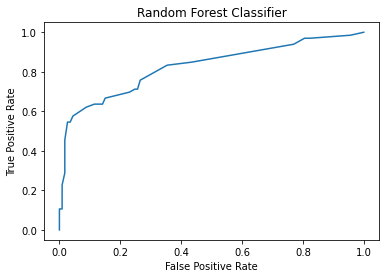

In [232]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

# Model Saving

In [233]:
import pickle
filename='Titanic_Prediction.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion

     Actual  Predict
580       1        1
841       0        0
406       0        0
394       1        0
453       1        1
..      ...      ...
338       1        0
53        1        1
184       1        0
751       1        0
711       0        0

[179 rows x 2 columns]


Text(0.5, 1.0, 'Best Line')

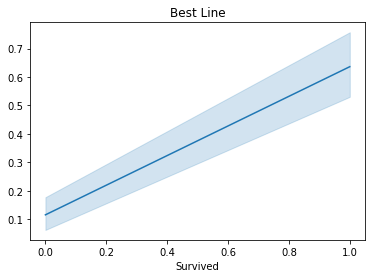

In [234]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rfc.predict(x_test)

print(res)
sns.lineplot(y_test, rfc.predict(x_test))
plt.title('Best Line')